In [5]:
import os
import numpy as np
import seaborn as sns
import pandas as pd
from atlas_vis import DKTAtlas62ROIPlotter

In [ ]:
### Function for brain surface mapping for LOBE scale 
# atlas_vis.plotter package. written by YH Song

from atlas_vis.plotter import DKAtlas68ROIPlotter

def roi68_for_lobe(df, tau_col_prefix='tau_z/LOBE', col_map=None):
    vertex_map = {
        'L_LT':  [7, 13, 28, 0, 5, 32, 31, 14],
        'R_LT':  [41, 47, 62, 34, 39, 66, 65, 48],
        'L_MT':  [4],
        'R_MT':  [38],
        'L_FRONTAL':  [26, 25, 2, 16, 18, 17, 10, 12, 22, 15, 30, 24, 1],
        'R_FRONTAL':  [60, 59, 36, 50, 52, 51, 44, 46, 56, 49, 64, 58, 35],
        'L_OCCIPITAL':  [9, 11, 3, 19],
        'R_OCCIPITAL':  [43, 45, 37, 53],
        'L_PARIETAL':  [27, 6, 29, 20, 23, 21, 8],
        'R_PARIETAL':  [61, 40, 63, 54, 57, 55, 42],
    }
    
    if col_map is None:
        col_map = { key: f"{tau_col_prefix}_{key}" for key in vertex_map.keys() }

    def _make_tau_array(row):
        arr = np.zeros(68, dtype=float)
        for key, indices in vertex_map.items():
            tau_val = row[col_map[key]]
            arr[indices] = tau_val
        return arr

    tau_matrix = np.stack(df.apply(_make_tau_array, axis=1))
    return tau_matrix

# plotter = DKAtlas68ROIPlotter(
#     cmap='Reds',
#     clim=(0.0, 5.0),  
#     window_size=(1200, 1000),
#     nan_color='lightgray',
#     background='white',
#     template_key='pial'
# )
# plotter2 = DKAtlas68ROIPlotter(
#     cmap='afmhot',
#     clim=(0.5, 1.2),  
#     window_size=(1200, 1000),
#     nan_color='lightgray',
#     background='white',
#     template_key='pial'
# )
plotter_62  = DKTAtlas62ROIPlotter(
    cmap='afmhot',
    clim=(0.5, 1.2),  
    window_size=(1200, 1000),
    nan_color='lightgray',
    background='white',
    template_key='pial'
)

In [62]:
## Surface Map of Raw VA ##
plotter_62  = DKTAtlas62ROIPlotter(
    cmap='Reds',
    clim=(0.5, 2),  
    window_size=(1200, 1000),
    nan_color='lightgray',
    background='white',
    template_key='pial'
)

labels_df = pd.read_csv('C:/Users/BREIN/Desktop/copathology_visualization_temp/data/FS_Lobes.csv')
region_to_label = {}
for _, row in labels_df.iterrows():
    roi = row['ROI']
    lh_label = row['lh']
    rh_label = row['rh']

    # Map both left and right hemisphere versions
    region_to_label[f'ctx_lh_{roi}'] = lh_label
    region_to_label[f'ctx_rh_{roi}'] = rh_label

# Function to convert region names to labels in a CSV file (only for specified columns)
def convert_csv_regions_to_labels(inp_df, cols_to_convert):
    rename_map = {col: region_to_label.get(col, col) for col in cols_to_convert}
    inp_df = inp_df.rename(columns=rename_map)
    return inp_df

df = pd.read_csv("C:/Users/BREIN/Desktop/copathology_visualization_temp/data/260108_wsev_final_df.csv")
region_cols = df.loc[:, 'ctx_lh_caudalanteriorcingulate':'ctx_rh_insula'].columns
hc_df = df[df['DX'] == 'HC']

X_hc = hc_df[region_cols].values.astype(float)
hc_mean = X_hc.mean(axis=0, keepdims=True)
hc_std  = X_hc.std(axis=0, keepdims=True) + 1e-8  # avoid divide-by-zero

for dx in df['DX'].unique():
    df_dx = df[df['DX'] == dx]
    print(dx)
    print(len(df_dx))
    
    # Get raw values and compute z-scores relative to HC
    X_raw = df_dx[region_cols].values.astype(float)
    X_zscore = (X_raw - hc_mean) / hc_std
    X_zscore = np.maximum(-X_zscore, 0.0)
    # Get mean of z-scores across subjects
    X_mean_zscore = X_zscore.mean(axis=0)

    l_values = X_mean_zscore[:31].tolist()
    r_values = X_mean_zscore[31:].tolist()
    print(len(l_values))
    print(len(r_values))
    print(np.min(l_values + r_values))
    print(np.max(l_values + r_values))

    plotter_62(l_values, r_values, save_path=f'./surface_maps/raw/{dx}.png')

AD
55
31
31
0.5348150512449252
2.450906683624809


C:\Users\BREIN\Desktop\copathology_visualization_temp\Python-Atlas-Visualization-main\atlas_vis\core\__init__.py:98: PyVistaDeprecationWarning: 
../Python-Atlas-Visualization-main/atlas_vis/core/__init__.py:98: Argument 'mesh' must be passed as a keyword argument to function 'BasePlotter.update_scalars'.
From version 0.50, passing this as a positional argument will result in a TypeError.
  self.plotter.update_scalars(l_value, mesh)
c:\Users\BREIN\anaconda3\envs\data_management\lib\site-packages\pyvista\plotting\plotter.py:4989: PyVistaDeprecationWarning: This method is deprecated and will be removed in a future version of PyVista. Directly modify the scalars of a mesh in-place instead.
  warnings.warn(
C:\Users\BREIN\Desktop\copathology_visualization_temp\Python-Atlas-Visualization-main\atlas_vis\core\__init__.py:100: PyVistaDeprecationWarning: 
../Python-Atlas-Visualization-main/atlas_vis/core/__init__.py:100: Argument 'mesh' must be passed as a keyword argument to function 'BasePlott

DLB
28
31
31
0.5354709989628819
2.0632905894558555
HC
49
31
31
0.30463379343211455
0.43162402791856014
PD
56
31
31
0.1831598891510236
0.7385593417688324
SVAD
21
31
31
0.43831797905288883
1.8880685314196068


In [40]:
## Surface Mapping for 62 rois ##
plotter_62  = DKTAtlas62ROIPlotter(
    cmap='Reds',
    clim=(0, 0.2),  
    window_size=(1200, 1000),
    nan_color='lightgray',
    background='white',
    template_key='pial'
)

df = pd.read_csv('C:/Users/BREIN/Desktop/copathology_visualization_temp/vanilla_LDA/lda_topic_atrophy_patterns_labels.csv')
# print(df.columns)
print(len(df))
for col in df.columns[1:]:
    print(col)
    l_values = df.loc[:30,col].to_list()
    r_values = df.loc[31:,col].to_list()
    print(len(l_values))
    print(len(r_values))
    print(np.min(l_values+r_values))
    print(np.max(l_values+r_values))

    plotter_62(l_values, r_values, save_path=f'./surface_maps/topicwise/{col}.png')

62
Topic_0
31
31
8.179623013995455e-05
0.143856242759828


C:\Users\BREIN\Desktop\copathology_visualization_temp\Python-Atlas-Visualization-main\atlas_vis\core\__init__.py:98: PyVistaDeprecationWarning: 
../Python-Atlas-Visualization-main/atlas_vis/core/__init__.py:98: Argument 'mesh' must be passed as a keyword argument to function 'BasePlotter.update_scalars'.
From version 0.50, passing this as a positional argument will result in a TypeError.
  self.plotter.update_scalars(l_value, mesh)
c:\Users\BREIN\anaconda3\envs\data_management\lib\site-packages\pyvista\plotting\plotter.py:4989: PyVistaDeprecationWarning: This method is deprecated and will be removed in a future version of PyVista. Directly modify the scalars of a mesh in-place instead.
  warnings.warn(
C:\Users\BREIN\Desktop\copathology_visualization_temp\Python-Atlas-Visualization-main\atlas_vis\core\__init__.py:100: PyVistaDeprecationWarning: 
../Python-Atlas-Visualization-main/atlas_vis/core/__init__.py:100: Argument 'mesh' must be passed as a keyword argument to function 'BasePlott

Topic_1
31
31
8.739231521583665e-05
0.1988321774590494
Topic_2
31
31
5.600266156046091e-05
0.1192305148719015
Topic_3
31
31
5.883176326239196e-05
0.0751244832434384
Topic_4
31
31
6.469101317563762e-05
0.0894295513946606
Topic_5
31
31
6.519350393726511e-05
0.1066872121140742


In [41]:
plotter_62  = DKTAtlas62ROIPlotter(
    cmap='Reds',
    clim=(0.01, 0.03),  
    window_size=(1200, 1000),
    nan_color='lightgray',
    background='white',
    template_key='pial'
)

df = pd.read_csv('C:/Users/BREIN/Desktop/copathology_visualization_temp/vanilla_LDA/lda_diagnosis_atrophy_maps_labels.csv')
# print(df.columns)
print(len(df))
for col in df.columns[1:]:
    print(col)
    l_values = df.loc[:30,col].to_list()
    r_values = df.loc[31:,col].to_list()
    print(len(l_values))
    print(len(r_values))
    print(np.min(l_values+r_values))
    print(np.max(l_values+r_values))

    plotter_62(l_values, r_values, save_path=f'./surface_maps/diagnosiswise/{col}.png')

62
AD
31
31
0.0084462634293169
0.0319807098576738


C:\Users\BREIN\Desktop\copathology_visualization_temp\Python-Atlas-Visualization-main\atlas_vis\core\__init__.py:98: PyVistaDeprecationWarning: 
../Python-Atlas-Visualization-main/atlas_vis/core/__init__.py:98: Argument 'mesh' must be passed as a keyword argument to function 'BasePlotter.update_scalars'.
From version 0.50, passing this as a positional argument will result in a TypeError.
  self.plotter.update_scalars(l_value, mesh)
c:\Users\BREIN\anaconda3\envs\data_management\lib\site-packages\pyvista\plotting\plotter.py:4989: PyVistaDeprecationWarning: This method is deprecated and will be removed in a future version of PyVista. Directly modify the scalars of a mesh in-place instead.
  warnings.warn(
C:\Users\BREIN\Desktop\copathology_visualization_temp\Python-Atlas-Visualization-main\atlas_vis\core\__init__.py:100: PyVistaDeprecationWarning: 
../Python-Atlas-Visualization-main/atlas_vis/core/__init__.py:100: Argument 'mesh' must be passed as a keyword argument to function 'BasePlott

DLB
31
31
0.0102143404029515
0.0285244528164062
PD
31
31
0.0096546784838481
0.0298958156923032
SVAD
31
31
0.0086396525191182
0.0315459534421377


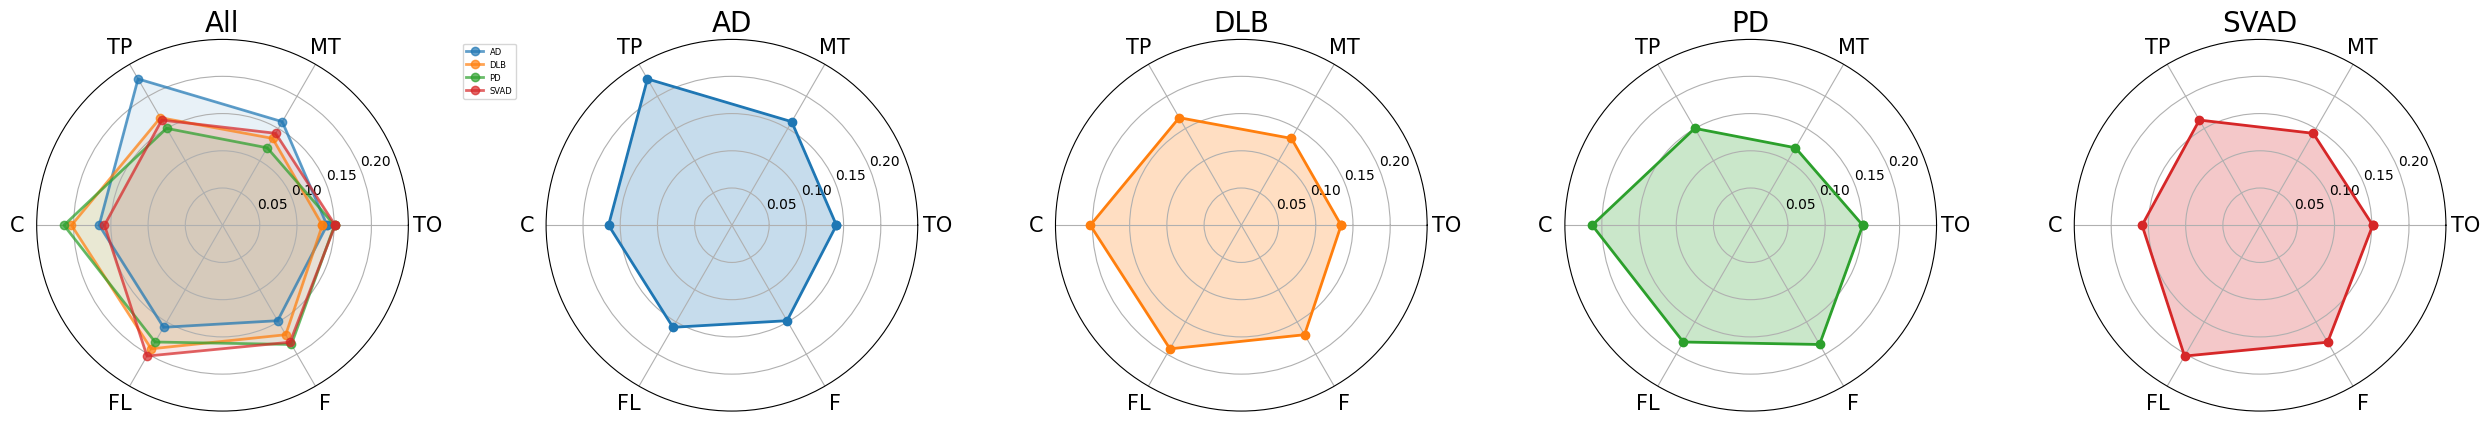

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('C:/Users/BREIN/Desktop/copathology_visualization_temp/vanilla_LDA/lda_diagnosis_topic_expression.csv')
subjects = df.iloc[:, 0].values
categories = df.columns[1:].tolist()
data = df.iloc[:, 1:].values

label_map = {'Topic_0': 'TO', 'Topic_1': 'MT', 'Topic_2': 'TP', 'Topic_3': 'C', 'Topic_4': 'FL', 'Topic_5': 'F'}
labels = [label_map[cat] for cat in categories]
num_vars = len(categories)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

# Calculate grid size (add 1 for the combined plot)
n_subjects = len(subjects)
n_plots = n_subjects + 1  # +1 for combined plot
n_cols = 5
n_rows = int(np.ceil(n_plots / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows),subplot_kw=dict(polar=True))
axes = axes.flatten()

colors = plt.cm.tab10.colors

# First subplot: all subjects combined
ax = axes[0]
for idx, (subject, values) in enumerate(zip(subjects, data)):
    values_closed = values.tolist() + [values[0]]
    ax.plot(angles, values_closed, 'o-', linewidth=2, 
            color=colors[idx % len(colors)], label=subject, alpha=0.7)
    ax.fill(angles, values_closed, alpha=0.1, color=colors[idx % len(colors)])

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, size=15)
ax.set_ylim(0, data.max() * 1.1)
ax.set_title('All', size=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0), fontsize=6)

# Remaining subplots: individual subjects
for idx, (subject, values) in enumerate(zip(subjects, data)):
    ax = axes[idx + 1]  # Offset by 1
    values_closed = values.tolist() + [values[0]]
    
    ax.plot(angles, values_closed, 'o-', linewidth=2, color=colors[idx % len(colors)])
    ax.fill(angles, values_closed, alpha=0.25, color=colors[idx % len(colors)])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, size=15)
    ax.set_ylim(0, data.max() * 1.1)
    ax.set_title(subject, size=20)

# Hide empty subplots
for idx in range(n_plots, len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.savefig('./figures/spider_grid.png', dpi=150, bbox_inches='tight')
plt.show()

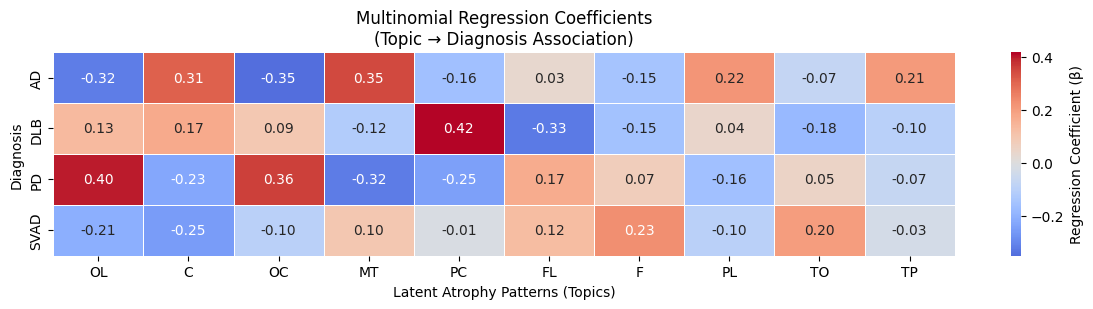

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# -------------------------------
# 1. Load coefficients
# -------------------------------

coef_df = pd.read_csv(
    "C:/Users/BREIN/Desktop/copathology_visualization_temp/lda_with_reg/topic_diagnosis_coefficients.csv",
    index_col=0
)

# -------------------------------
# 2. Reorder topics by importance (optional)
# -------------------------------

topic_order = coef_df.abs().mean(axis=0).sort_values(ascending=False).index
coef_df = coef_df[topic_order]

# -------------------------------
# 3. Map topic labels
# -------------------------------

label_map = {'Topic_0': 'TO', 'Topic_1': 'MT', 'Topic_2': 'TP', 'Topic_3': 'C', 'Topic_4': 'FL', 'Topic_5': 'F'}
# label_map = {'Topic_0': 'TO', 'Topic_1': 'MT', 'Topic_2': 'TP', 'Topic_3': 'C', 'Topic_4': 'FL', 'Topic_5': 'F',
#              'Topic_6': 'OL', 'Topic_7': 'PL', 'Topic_8': 'PC', 'Topic_9': 'OC'}
new_labels = [label_map[t] for t in coef_df.columns]
coef_df.columns = new_labels

# -------------------------------
# 4. Plot heatmap
# -------------------------------

plt.figure(figsize=(1.2 * coef_df.shape[1], 0.8 * coef_df.shape[0]))

sns.heatmap(
    coef_df,
    cmap="coolwarm",
    center=0,
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"label": "Regression Coefficient (β)"}
)

plt.xlabel("Latent Atrophy Patterns (Topics)")
plt.ylabel("Diagnosis")
plt.title("Multinomial Regression Coefficients\n(Topic → Diagnosis Association)")
plt.tight_layout()
plt.savefig('./figures/regression_coefficients.png', dpi=150, bbox_inches='tight')
plt.show()


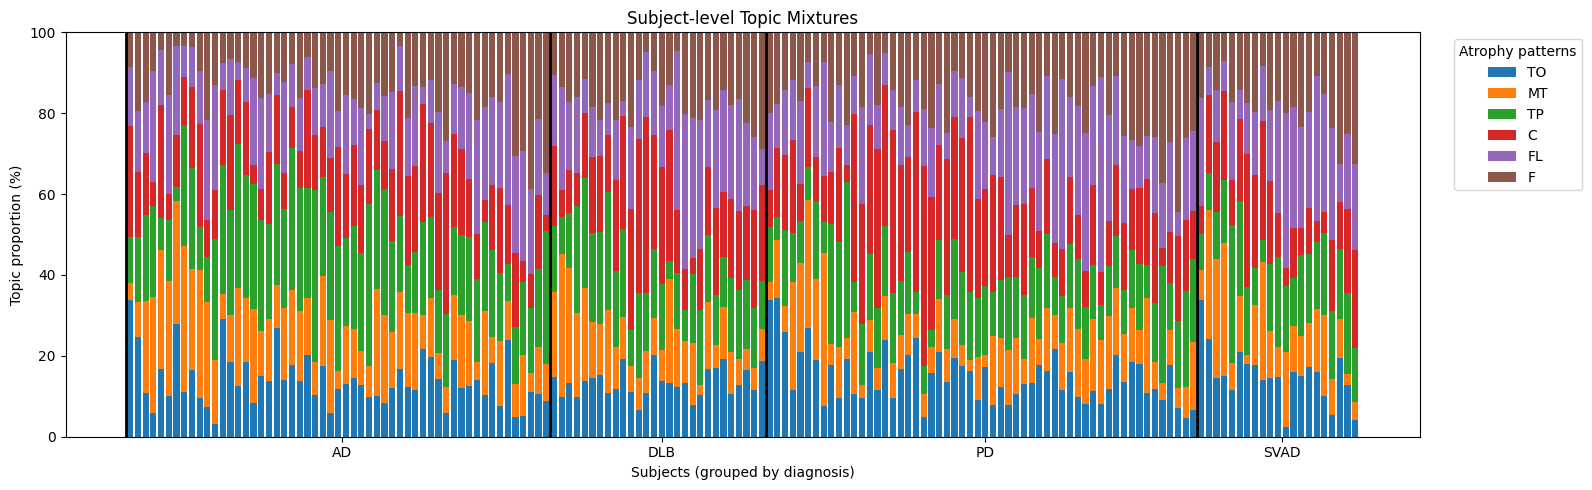

In [7]:
import matplotlib.pyplot as plt
csv_path = (
    "C:/Users/BREIN/Desktop/copathology_visualization_temp/"
    "vanilla_LDA/wsev_results/lda_subject_topic_weights.csv"
)
label_map = {'Topic_0': 'TO', 'Topic_1': 'MT', 'Topic_2': 'TP', 'Topic_3': 'C', 'Topic_4': 'FL', 'Topic_5': 'F'}

theta_df = pd.read_csv(csv_path)
topic_cols = [c for c in theta_df.columns if c.startswith("Topic_")]

# -------------------------------
# 3. Convert topic weights to %
# -------------------------------

theta_pct = theta_df[topic_cols].values
theta_pct = theta_pct / theta_pct.sum(axis=1, keepdims=True) * 100

dx = theta_df["DX"].values

# -------------------------------
# 4. Sort subjects by DX, then dominant topic
# -------------------------------

dominant_topic = np.argmax(theta_pct, axis=1)

sort_df = pd.DataFrame({
    "DX": dx,
    "dominant_topic": dominant_topic
})

sort_idx = (
    sort_df
    .sort_values(["DX", "dominant_topic"])
    .index
)

theta_sorted = theta_pct[sort_idx]
dx_sorted = dx[sort_idx]

# -------------------------------
# 5. Plot stacked percentage bars
# -------------------------------

fig, ax = plt.subplots(figsize=(16, 5))

x = np.arange(theta_sorted.shape[0])
bottom = np.zeros(theta_sorted.shape[0])

# Use topic order as defined in label_map
ordered_topics = list(label_map.keys())

for topic in ordered_topics:
    k = topic_cols.index(topic)
    display_label = label_map[topic]

    ax.bar(
        x,
        theta_sorted[:, k],
        bottom=bottom,
        label=display_label
    )
    bottom += theta_sorted[:, k]

# -------------------------------
# 6. Add diagnosis separators and labels
# -------------------------------

unique_dx = pd.unique(dx_sorted)

start = 0
dx_centers = []

for d in unique_dx:
    count = np.sum(dx_sorted == d)
    center = start + count / 2
    dx_centers.append((d, center))

    ax.axvline(start - 0.5, color="black", linewidth=2)
    start += count

# ax.axvline(start - 0.5, color="black", linewidth=2)

# -------------------------------
# 7. Final formatting
# -------------------------------

ax.set_ylim(0, 100)
ax.set_ylabel("Topic proportion (%)")
ax.set_xlabel("Subjects (grouped by diagnosis)")
ax.set_title("Subject-level Topic Mixtures")
ax.set_xticks([c[1] for c in dx_centers])
ax.set_xticklabels([c[0] for c in dx_centers])
ax.legend(
    title="Atrophy patterns",
    bbox_to_anchor=(1.02, 1),
    loc="upper left"
)
plt.tight_layout()
plt.savefig('C:/Users/BREIN/Desktop/copathology_visualization_temp/vanilla_LDA/wsev_results/figures/subject_topic_proportions.png')
plt.show()


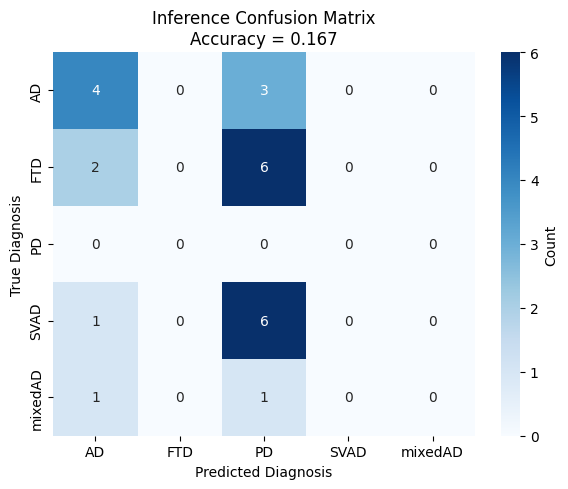

In [15]:
## Confusion Matrix ##
from sklearn.metrics import confusion_matrix, accuracy_score

def plot_confusion_matrix_from_csv(
    csv_path,
    true_col="DX",
    pred_col="Predicted_DX",
    normalize=True,
    figsize=(6, 5),
    cmap="Blues",
    save_path=None,
    title="Confusion Matrix"
):
    """
    Plot a confusion matrix from an inference summary CSV
    and display accuracy in the figure header.
    """

    # -------------------------------
    # 1. Load CSV
    # -------------------------------
    df = pd.read_csv(csv_path)

    y_true = df[true_col].values
    y_pred = df[pred_col].values

    labels = np.unique(np.concatenate([y_true, y_pred]))

    # -------------------------------
    # 2. Metrics
    # -------------------------------
    acc = accuracy_score(y_true, y_pred)

    cm = confusion_matrix(y_true, y_pred, labels=labels)

    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1, keepdims=True)
        cm = np.nan_to_num(cm)

    # -------------------------------
    # 3. Plot
    # -------------------------------
    plt.figure(figsize=figsize)
    sns.heatmap(
        cm,
        annot=True,
        fmt=".2f" if normalize else "d",
        cmap=cmap,
        xticklabels=labels,
        yticklabels=labels,
        cbar_kws={"label": "Proportion" if normalize else "Count"}
    )

    plt.xlabel("Predicted Diagnosis")
    plt.ylabel("True Diagnosis")

    # 🔹 Accuracy in title
    plt.title(f"{title}\nAccuracy = {acc:.3f}")

    plt.tight_layout()

    if save_path is not None:
        plt.savefig(save_path, dpi=300)

    plt.show()
conf_csv = "C:/Users/BREIN/Desktop/copathology_visualization_temp/wsev_results/external_inference_results/inference_summary.csv"

plot_confusion_matrix_from_csv(
    csv_path=conf_csv,
    true_col="True_DX",
    pred_col="Predicted_DX",
    normalize=False,
    save_path=os.path.join("C:/Users/BREIN/Desktop/copathology_visualization_temp/vanilla_LDA/wsev_results/figures/external_validation_confusion_matrix.png"),
    title="Inference Confusion Matrix"
)
